In [1]:
!pip install textblob vaderSentiment wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.7 MB/s eta 0:00:00


## 📊 Data Overview

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud

import re


In [3]:
# Load the student_feedback.csv file into a pandas DataFrame named df
df = pd.read_csv('/content/Student_Satisfaction_Survey.csv', encoding='latin1')

In [4]:
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [6]:
df.describe()


,SN,Total Feedback Given,Total Configured,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,10.500000,14.310345,92.517241,0.527586,1.187931,2.537931,5.082759,4.974138
std,5.771259,16.488031,114.491780,1.305336,1.686334,3.193302,7.288293,6.494931
min,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,3.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,10.500000,7.000000,42.000000,0.000000,0.000000,1.000000,3.000000,3.000000
75%,15.250000,17.000000,123.000000,1.000000,2.000000,3.250000,6.000000,6.000000
max,20.000000,74.000000,559.000000,19.000000,8.000000,26.000000,52.000000,38.000000


In [7]:
df.isnull().sum()


,0
SN,0
Total Feedback Given,0
Total Configured,0
Questions,0
Weightage 1,0
Weightage 2,0
Weightage 3,0
Weightage 4,0
Weightage 5,0
Average/ Percentage,0


In [8]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df["Clean_Feedback"] = df["Questions"].apply(clean_text)
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Clean_Feedback
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,how much of the syllabus was covered in the class
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,how well did the teachers prepare for the classes
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,how well were the teachers able to communicate
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,the teachers approach to teaching can best be ...
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,fairness of the internal evaluation process by...


### Average Percentage Rating by Question

In [10]:
# Extract the percentage part from 'Average/ Percentage' and convert to float
df['Percentage_Rating'] = df['Average/ Percentage'].apply(lambda x: float(x.split(' / ')[1]))

# Group by 'Questions' and calculate the mean of 'Percentage_Rating'
question_ratings_percentage = df.groupby("Questions")["Percentage_Rating"].mean().sort_values(ascending=False)
display(question_ratings_percentage)

,Percentage_Rating
Questions,
Fairness of the internal evaluation process by the teachers.,84.296897
How well were the teachers able to communicate?,83.946552
How well did the teachers prepare for the classes?,81.793793
The teachers illustrate the concepts through examples and applications.,81.331034
"Teachers inform you about your expected competencies, course outcomes and program\noutcomes.",79.603448
How much of the syllabus was covered in the class?,79.051724
Was your performance in assignments discussed with you?,78.204483
Teachers encourage you to participate in extracurricular activities.,78.016207
"Efforts are made by the institute/ teachers to inculcate soft skills, life skills and employability skills to make you ready for the world of work.",77.060000


In [11]:
question_ratings_percentage.head(5)


,Percentage_Rating
Questions,
Fairness of the internal evaluation process by the teachers.,84.296897
How well were the teachers able to communicate?,83.946552
How well did the teachers prepare for the classes?,81.793793
The teachers illustrate the concepts through examples and applications.,81.331034
"Teachers inform you about your expected competencies, course outcomes and program\noutcomes.",79.603448


### Percentage Rating Distribution

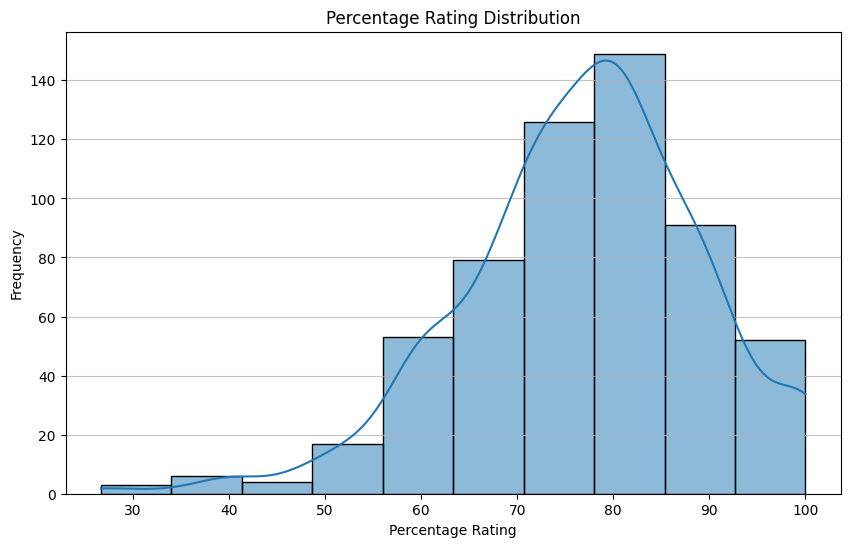

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(x="Percentage_Rating", data=df, bins=10, kde=True)
plt.title("Percentage Rating Distribution")
plt.xlabel("Percentage Rating")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

### Average Percentage Rating by Course Name

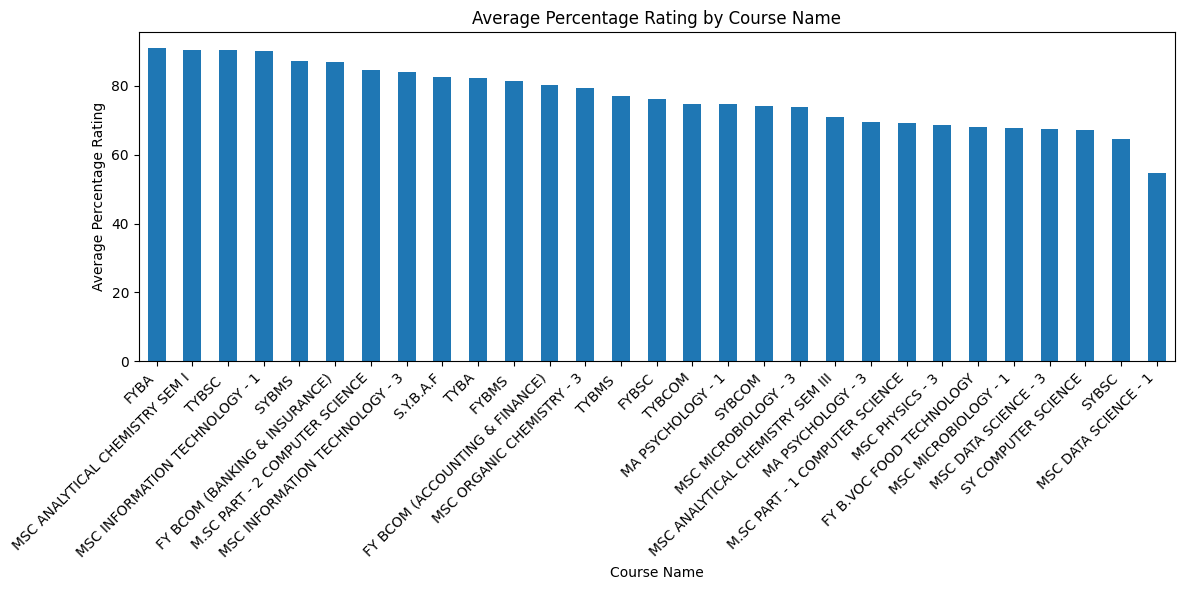

In [13]:
df.columns = df.columns.str.strip()
course_ratings_percentage = df.groupby("Course Name")["Percentage_Rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
course_ratings_percentage.plot(kind="bar")
plt.title("Average Percentage Rating by Course Name")
plt.xlabel("Course Name")
plt.ylabel("Average Percentage Rating")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

## 🧐 Sentiment Analysis

### Sentiment Distribution (TextBlob)

In [14]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df["Sentiment_Score"] = df["Clean_Feedback"].apply(get_sentiment)
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Clean_Feedback,Percentage_Rating,Sentiment_Score
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,how much of the syllabus was covered in the class,60.0,0.2
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,how well did the teachers prepare for the classes,100.0,0.0
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,how well were the teachers able to communicate,100.0,0.5
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,the teachers approach to teaching can best be ...,60.0,1.0
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,fairness of the internal evaluation process by...,80.0,0.0


from matplotlib import pyplot as plt
_df_0['SN'].plot(kind='hist', bins=20, title='SN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Weightage 3'].plot(kind='hist', bins=20, title='Weightage 3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Weightage 4'].plot(kind='hist', bins=20, title='Weightage 4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Weightage 5'].plot(kind='hist', bins=20, title='Weightage 5')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Questions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Average/ Percentage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Clean_Feedback').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='SN', y='Weightage 3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Weightage 3', y='Weightage 4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Weightage 4', y='Weightage 5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Weightage 5', y='Percentage_Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SN']
  ys = series['Weightage 3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('SN', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Questions')):
  _plot_series(series, series_name, i)
  fig.legend(title='Questions', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SN')
_ = plt.ylabel('Weightage 3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SN']
  ys = series['Weightage 3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('SN', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Average/ Percentage')):
  _plot_series(series, series_name, i)
  fig.legend(title='Average/ Percentage', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SN')
_ = plt.ylabel('Weightage 3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SN']
  ys = series['Weightage 3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('SN', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Clean_Feedback')):
  _plot_series(series, series_name, i)
  fig.legend(title='Clean_Feedback', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SN')
_ = plt.ylabel('Weightage 3')

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SN']
  ys = series['Weightage 5']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('SN', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Questions')):
  _plot_series(series, series_name, i)
  fig.legend(title='Questions', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SN')
_ = plt.ylabel('Weightage 5')

from matplotlib import pyplot as plt
_df_15['SN'].plot(kind='line', figsize=(8, 4), title='SN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Weightage 3'].plot(kind='line', figsize=(8, 4), title='Weightage 3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Weightage 4'].plot(kind='line', figsize=(8, 4), title='Weightage 4')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Weightage 5'].plot(kind='line', figsize=(8, 4), title='Weightage 5')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Average/ Percentage'].value_counts()
    for x_label, grp in _df_19.groupby('Questions')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Questions')
_ = plt.ylabel('Average/ Percentage')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Clean_Feedback'].value_counts()
    for x_label, grp in _df_20.groupby('Average/ Percentage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Average/ Percentage')
_ = plt.ylabel('Clean_Feedback')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Questions'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='SN', y='Questions', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Average/ Percentage'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='SN', y='Average/ Percentage', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Clean_Feedback'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='SN', y='Clean_Feedback', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Questions'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Weightage 3', y='Questions', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


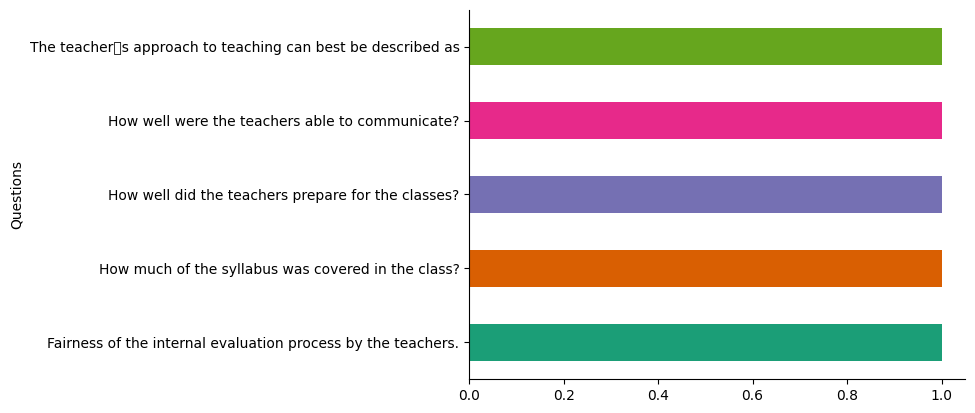

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Questions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
def sentiment_label(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Sentiment_Score"].apply(sentiment_label)
df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Clean_Feedback,Percentage_Rating,Sentiment_Score,Sentiment
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,how much of the syllabus was covered in the class,60.0,0.2,Positive
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,how well did the teachers prepare for the classes,100.0,0.0,Neutral
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,how well were the teachers able to communicate,100.0,0.5,Positive
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,the teachers approach to teaching can best be ...,60.0,1.0,Positive
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,fairness of the internal evaluation process by...,80.0,0.0,Neutral


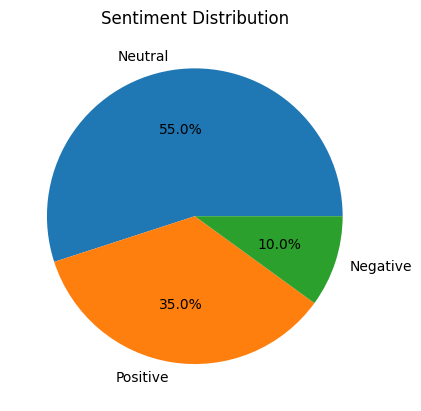

In [20]:
plt.figure()
df["Sentiment"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()


### VADER Sentiment Analysis

In [21]:
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["VADER_Sentiment"] = df["Clean_Feedback"].apply(vader_sentiment)
df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Clean_Feedback,Percentage_Rating,Sentiment_Score,Sentiment,VADER_Sentiment
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,how much of the syllabus was covered in the class,60.0,0.2,Positive,Neutral
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,how well did the teachers prepare for the classes,100.0,0.0,Neutral,Positive
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,how well were the teachers able to communicate,100.0,0.5,Positive,Positive
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,the teachers approach to teaching can best be ...,60.0,1.0,Positive,Positive
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,fairness of the internal evaluation process by...,80.0,0.0,Neutral,Neutral


from matplotlib import pyplot as plt
_df_25['SN'].plot(kind='hist', bins=20, title='SN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Weightage 3'].plot(kind='hist', bins=20, title='Weightage 3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Weightage 4'].plot(kind='hist', bins=20, title='Weightage 4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Weightage 5'].plot(kind='hist', bins=20, title='Weightage 5')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_29.groupby('Questions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_30.groupby('Average/ Percentage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_31.groupby('Clean_Feedback').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='SN', y='Weightage 3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='Weightage 3', y='Weightage 4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='Weightage 4', y='Weightage 5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='Weightage 5', y='Percentage_Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SN']
  ys = series['Weightage 3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_37.sort_values('SN', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Questions')):
  _plot_series(series, series_name, i)
  fig.legend(title='Questions', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SN')
_ = plt.ylabel('Weightage 3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SN']
  ys = series['Weightage 3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('SN', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Average/ Percentage')):
  _plot_series(series, series_name, i)
  fig.legend(title='Average/ Percentage', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SN')
_ = plt.ylabel('Weightage 3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SN']
  ys = series['Weightage 3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('SN', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Clean_Feedback')):
  _plot_series(series, series_name, i)
  fig.legend(title='Clean_Feedback', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SN')
_ = plt.ylabel('Weightage 3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SN']
  ys = series['Weightage 3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('SN', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SN')
_ = plt.ylabel('Weightage 3')

from matplotlib import pyplot as plt
_df_41['SN'].plot(kind='line', figsize=(8, 4), title='SN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['Weightage 3'].plot(kind='line', figsize=(8, 4), title='Weightage 3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['Weightage 4'].plot(kind='line', figsize=(8, 4), title='Weightage 4')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_44['Weightage 5'].plot(kind='line', figsize=(8, 4), title='Weightage 5')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Average/ Percentage'].value_counts()
    for x_label, grp in _df_45.groupby('Questions')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Questions')
_ = plt.ylabel('Average/ Percentage')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Clean_Feedback'].value_counts()
    for x_label, grp in _df_46.groupby('Average/ Percentage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Average/ Percentage')
_ = plt.ylabel('Clean_Feedback')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sentiment'].value_counts()
    for x_label, grp in _df_47.groupby('Clean_Feedback')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Clean_Feedback')
_ = plt.ylabel('Sentiment')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VADER_Sentiment'].value_counts()
    for x_label, grp in _df_48.groupby('Sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sentiment')
_ = plt.ylabel('VADER_Sentiment')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_49['Questions'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_49, x='SN', y='Questions', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_50['Average/ Percentage'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_50, x='SN', y='Average/ Percentage', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_51['Clean_Feedback'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_51, x='SN', y='Clean_Feedback', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='SN', y='Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

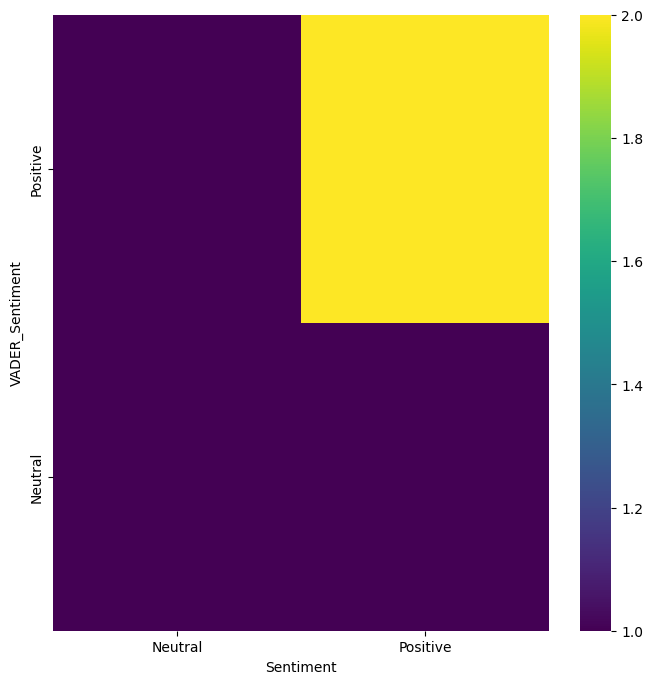

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VADER_Sentiment'].value_counts()
    for x_label, grp in _df_48.groupby('Sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sentiment')
_ = plt.ylabel('VADER_Sentiment')

#  Percentage Rating vs Sentiment

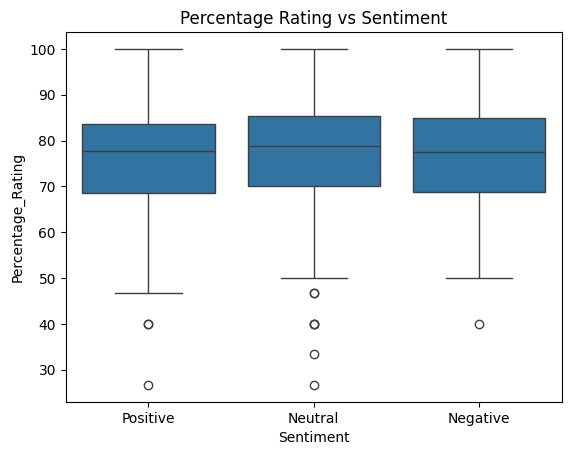

In [25]:
sns.boxplot(x="Sentiment", y="Percentage_Rating", data=df)
plt.title("Percentage Rating vs Sentiment")
plt.show()

### Average Percentage Rating by Basic Courses

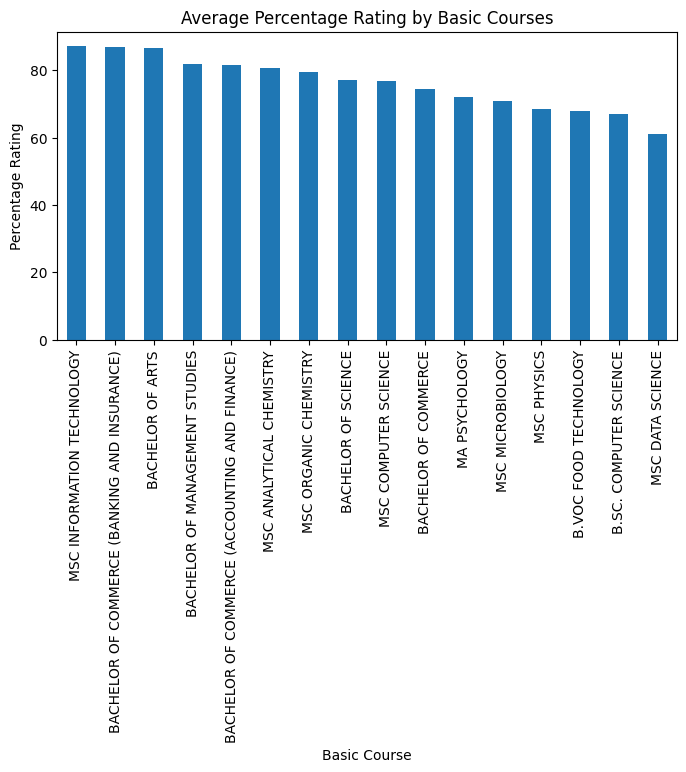

In [26]:
dept_rating = df.groupby("Basic Course")["Percentage_Rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
dept_rating.plot(kind="bar")
plt.title("Average Percentage Rating by Basic Courses")
plt.ylabel("Percentage Rating")
plt.show()

### Common Words in Student Feedback

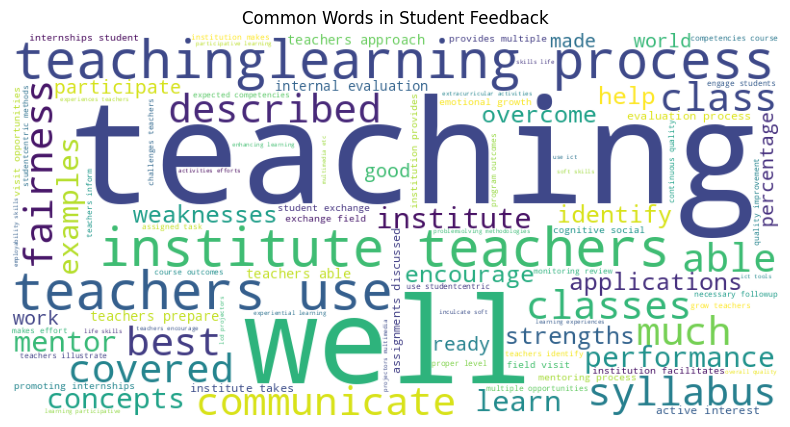

In [27]:
text = " ".join(df["Clean_Feedback"])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Common Words in Student Feedback")
plt.show()


### Common Complaints (Negative Feedback)

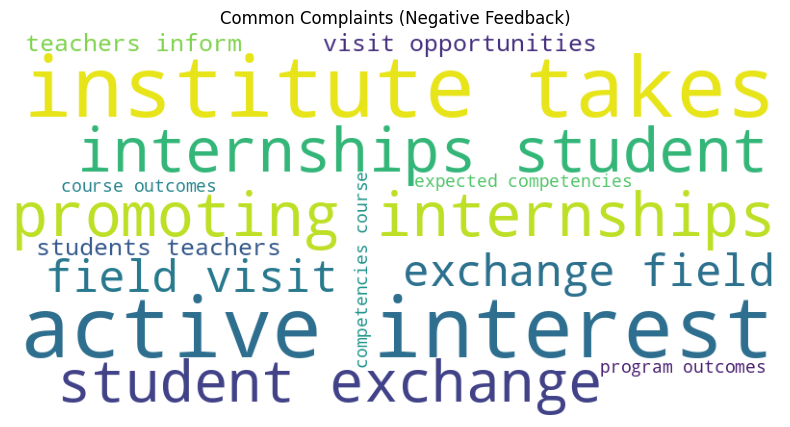

In [28]:
negative_text = " ".join(df[df["Sentiment"]=="Negative"]["Clean_Feedback"])

neg_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.title("Common Complaints (Negative Feedback)")
plt.show()


In [29]:
top_events = question_ratings_percentage.head(3)
low_events = question_ratings_percentage.tail(3)

top_events, low_events

(Questions
 Fairness of the internal evaluation process by the teachers.    84.296897
 How well were the teachers able to communicate?                 83.946552
 How well did the teachers prepare for the classes?              81.793793
 Name: Percentage_Rating, dtype: float64,
 Questions
 The teachers identify your strengths and encourage you to provide the proper level of challenges.                     72.304483
 What percentage of teachers use ICT tools such as LCD projectors, Multimedia, etc. while teaching?                    71.682414
 The teaching and mentoring process in your institution facilitates you in cognitive, social and\nemotional growth.    71.578966
 Name: Percentage_Rating, dtype: float64)

## 📝 Key Insights & Recommendations

In [30]:
print("📌 KEY INSIGHTS & RECOMMENDATIONS\n")

print("Top Rated Events:")
print(top_events)

print("\nAreas for Improvement:")
print(low_events)

print("\nGeneral Recommendations:")
print("- Improve logistics and time management")
print("- Increase interactive sessions")
print("- Enhance audio/visual arrangements")
print("- Collect structured feedback regularly")


📌 KEY INSIGHTS & RECOMMENDATIONS

Top Rated Events:
Questions
Fairness of the internal evaluation process by the teachers.    84.296897
How well were the teachers able to communicate?                 83.946552
How well did the teachers prepare for the classes?              81.793793
Name: Percentage_Rating, dtype: float64

Areas for Improvement:
Questions
The teachers identify your strengths and encourage you to provide the proper level of challenges.                     72.304483
What percentage of teachers use ICT tools such as LCD projectors, Multimedia, etc. while teaching?                    71.682414
The teaching and mentoring process in your institution facilitates you in cognitive, social and\nemotional growth.    71.578966
Name: Percentage_Rating, dtype: float64

General Recommendations:
- Improve logistics and time management
- Increase interactive sessions
- Enhance audio/visual arrangements
- Collect structured feedback regularly
